In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Generate synthetic data with two classes
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.5)

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
# Make predictions on the test set
y_pred = svm.predict(X_test)

In [6]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


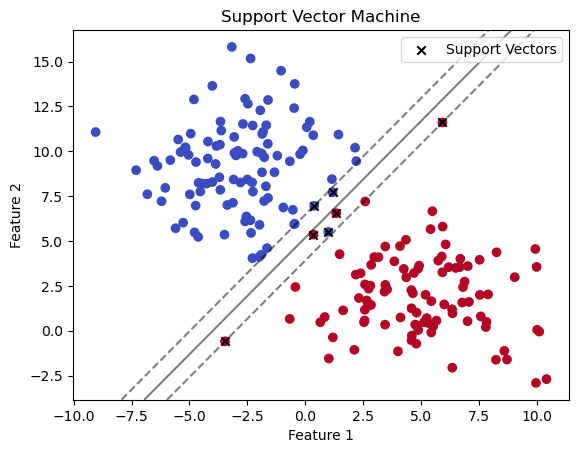

In [12]:
# Plot the data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], color='black', marker='x', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)
# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.legend()
plt.title('Support Vector Machine')
plt.show()